This dataset doesn't have gender information but therefore it contains data until 2000

In [3]:
from school_analysis.preprocessing.load import Loader
import pandas as pd

loader = Loader()

def load_special_edu_support_percentage():
    melted_df = loader.load('students_with_special_educational_support_no_gender')

    melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y')
    melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')
    total_over_years = melted_df.groupby(['year','school'])['total'].sum()

    children_type = loader.load('school-children-by-type')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    
    child_amount_per_year = children_type.groupby(['year','school'])['Value'].sum()


    merged_df = pd.merge(total_over_years, child_amount_per_year,on=['year','school'])
    merged_df['edu_support_relative'] = merged_df['total']/merged_df['Value'] 
    return merged_df



special_edu_support = load_special_edu_support_percentage()
special_edu_support


total     Value  \
year       school                                                          
2000-01-01 Free Waldorf Schools                           14.0   18892.0   
           Grammar schools (8 years of schooling)          0.0       0.0   
           Grammar schools (9 years of schooling)        812.0  953156.0   
           Integrated comprehensive schools             3856.0  350952.0   
           Intermediate schools                          842.0  931112.0   
...                                                        ...       ...   
2021-01-01 Integrated comprehensive schools            71086.0  638996.0   
           Intermediate schools                        13968.0  526034.0   
           Schools with various courses of education   32931.0  375669.0   
           Secondary general schools                   24938.0  271752.0   
           Special schools                            321806.0  127566.0   

                                                      edu_support_relative  
year       school                                                           
2000-01-01 Free Waldorf Schools                                   0.000741  
           Grammar schools (8 years of schooling)                      NaN  
           Grammar schools (9 years of schooling)                 0.000852  
           Integrated comprehensive schools                       0.010987  
           Intermediate schools                                   0.000904  
...                                                                    ...  
2021-01-01 Integrated comprehensive schools                       0.111246  
           Intermediate schools                                   0.026553  
           Schools with various courses of education              0.087660  
           Secondary general schools                              0.091767  
           Special schools                                        2.522663  

[176 rows x 3 columns]

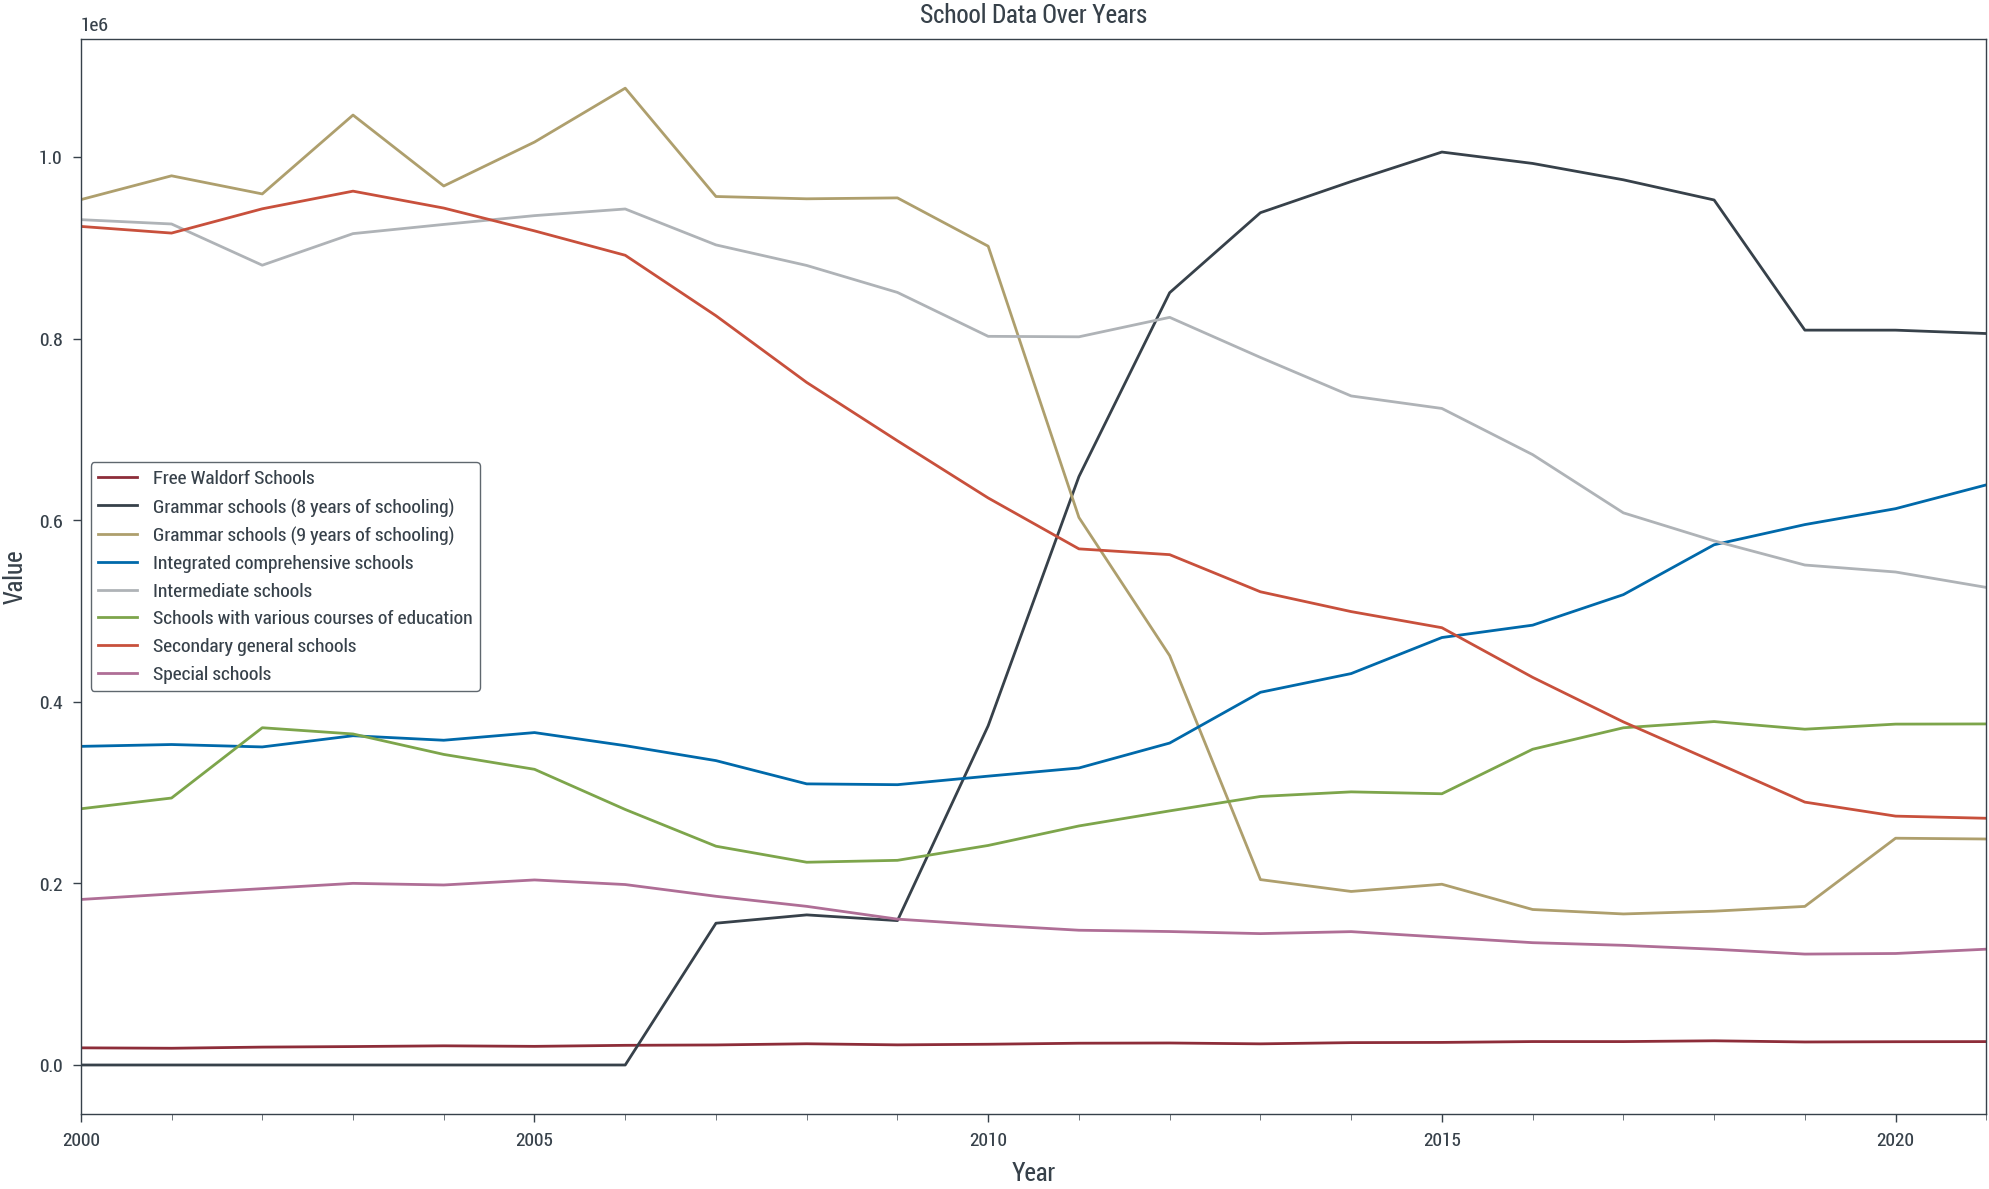

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
for school in special_edu_support.index.get_level_values(1).unique():
    special_edu_support.xs(school, level='school')['Value'].plot(ax=ax, label=school)

plt.title('School Data Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()